In [3]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [4]:
# Positioning the sensors - each representing a sensor
k1 = (1/np.sqrt(2),1/np.sqrt(2))
k2 = (-1/np.sqrt(2),1/np.sqrt(2))
k3 = (-1/np.sqrt(2),-1/np.sqrt(2))
k4 = (1/np.sqrt(2),-1/np.sqrt(2))

# Actual location of object
actual_xy = (0.2,0.3)
sensors = [k1,k2,k3,k4]


# Setting the sigma values
sig_x=0.1
sig_y=0.1
sig_i=.01

In [5]:
def dist_pt(p1,p2):
    # Assuming points are tuples and calculates Euclidean Distance

    return ((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)**(0.5)

In [17]:
def val_measure(k):
    # Measuring distance between sensor and actual position
    value = dist_pt(k,actual_xy) + np.random.normal(scale=sig_i)
    if value > 0:
        return value
    else:
        val_measure(k)

In [18]:
sensor_val = dict()
sensor_val[k1] = round(val_measure(k1),5)
sensor_val[k2] = round(val_measure(k2),5)
sensor_val[k3] = round(val_measure(k3),5)
sensor_val[k4] = round(val_measure(k4),5)

print ("Data of the Sensor is :\n", sensor_val)

for j,i in enumerate(sensor_val):
    print ("Sensor k"+str(j+1)+" distance from Actual positon", sensor_val[i])

Data of the Sensor is :
 {(0.7071067811865475, 0.7071067811865475): 0.66386, (-0.7071067811865475, 0.7071067811865475): 1.00659, (-0.7071067811865475, -0.7071067811865475): 1.35274, (0.7071067811865475, -0.7071067811865475): 1.10372}
Sensor k1 distance from Actual positon 0.66386
Sensor k2 distance from Actual positon 1.00659
Sensor k3 distance from Actual positon 1.35274
Sensor k4 distance from Actual positon 1.10372


In [19]:
from numpy.core.numeric import ones_like
# Pre-defining the contour level for all plots
cont_lev=[]

for i in range(0,300,10):
    cont_lev.append(i)

# Creating a meshgrid
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)


# Getting MAP objective values
def f0(x, y):
    # No sensor present
    priors = (x ** 2) / (sig_x ** 2) + (y ** 2) / (sig_y ** 2)
    return priors

def f1(x, y):
    # 1 sensor present
    one_sensor = (np.square(sensor_val[k1] - np.sqrt((k1[0] - x) ** 2 + (k1[1] - y) ** 2))) * (1 / sig_i ** 2)
    priors = (x ** 2) / (sig_x ** 2) + (y ** 2) / (sig_y ** 2)
    return one_sensor + priors

def f2(x, y):
    # 2 sensors present
    priors = (x ** 2) / (sig_x ** 2) + (y ** 2) / (sig_y ** 2)
    one_sensor = (np.square(sensor_val[k1] - np.sqrt((k1[0] - x) ** 2 + (k1[1] - y) ** 2))) * (1 / sig_i ** 2)
    two_sensor = (np.square(sensor_val[k2] - np.sqrt((k2[0] - x) ** 2 + (k2[1] - y) ** 2))) * (1 / sig_i ** 2)
    return one_sensor + two_sensor + priors

def f3(x, y):
    # 3 sensors present
    priors = (x**2)/(sig_x**2)+(y**2)/(sig_y**2)
    one_sensor = (np.square(sensor_val[k1] - np.sqrt((k1[0] - x) ** 2 + (k1[1] - y) ** 2))) * (1 / sig_i ** 2)
    two_sensor = (np.square(sensor_val[k2] - np.sqrt((k2[0] - x) ** 2 + (k2[1] - y) ** 2))) * (1 / sig_i ** 2)
    three_sensor = (np.square(sensor_val[k3] - np.sqrt((k3[0] - x) ** 2 + (k3[1] - y) ** 2))) * (1 / sig_i ** 2)
    return one_sensor + two_sensor + three_sensor + priors

def f4(x, y):
    # 4 sensors present
    priors = (x ** 2) / (sig_x ** 2) + (y ** 2) / (sig_y ** 2)
    one_sensor = (np.square(sensor_val[k1] - np.sqrt((k1[0] - x) ** 2 + (k1[1] - y) ** 2))) * (1 / sig_i ** 2)
    two_sensor = (np.square(sensor_val[k2] - np.sqrt((k2[0] - x) ** 2 + (k2[1] - y) ** 2))) * (1 / sig_i ** 2)
    three_sensor = (np.square(sensor_val[k3] - np.sqrt((k3[0] - x) ** 2 + (k3[1] - y) ** 2))) * (1 / sig_i ** 2)
    four_sensor = (np.square(sensor_val[k4] - np.sqrt((k4[0] - x) ** 2 + (k4[1] - y) ** 2))) * (1 / sig_i ** 2)
    return one_sensor + two_sensor + three_sensor + four_sensor + priors


In [36]:
def plots(f,num_sensors):
    # Plotting graphs based on number of sensors and MAP objectie values
    Z = f(X, Y)   # computing Z

    from matplotlib.pyplot import figure

    fig = figure(num = None, figsize = (15, 12), dpi = 100, facecolor = 'pink', edgecolor= 'white')

    # plot contour
    plt.contourf(X, Y, Z, 20, cmap='RdGy',levels = cont_lev);

    # set true labels and sensor positions
    plt.plot([actual_xy[0]],  [actual_xy[1]],  marker  =  'x',  markersize  =  20,  color  =  "blue",  label  =  "Actual XY",  mew = 2)
    if num_sensors  ==  1:
        plt.plot([k1[0]],  [k1[1]],  marker = 'o',  markersize = 10,  color = "brown", label = "Sensor 1")
    elif num_sensors == 2:
        plt.plot([k1[0]],  [k1[1]],  marker = 'o',  markersize = 10,  color = "brown", label = "Sensor 1")
        plt.plot([k3[0]],  [k3[1]],  marker = 'o',  markersize = 10,  color = "brown", label = "Sensor 2")
    elif num_sensors == 3:
        plt.plot([k1[0]],  [k1[1]],  marker = 'o',  markersize = 10,  color = "brown", label = "Sensor 1")
        plt.plot([k2[0]],  [k2[1]],  marker = 'o',  markersize = 10,  color = "brown", label = "Sensor 2")
        plt.plot([k3[0]],  [k3[1]],  marker = 'o',  markersize = 10,  color = "brown", label = "Sensor 3")
    elif num_sensors == 4:
        plt.plot([k1[0]],  [k1[1]],  marker = 'o',  markersize = 10,  color = "brown", label = "Sensor 1")
        plt.plot([k2[0]],  [k2[1]],  marker = 'o',  markersize = 10,  color = "brown", label = "Sensor 2")
        plt.plot([k3[0]],  [k3[1]],  marker = 'o',  markersize = 10,  color = "brown", label = "Sensor 3")
        plt.plot([k4[0]],  [k4[1]],  marker = 'o',  markersize = 10,  color = "brown", label = "Sensor 4")

    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.colorbar();
    plt.legend();
    return fig

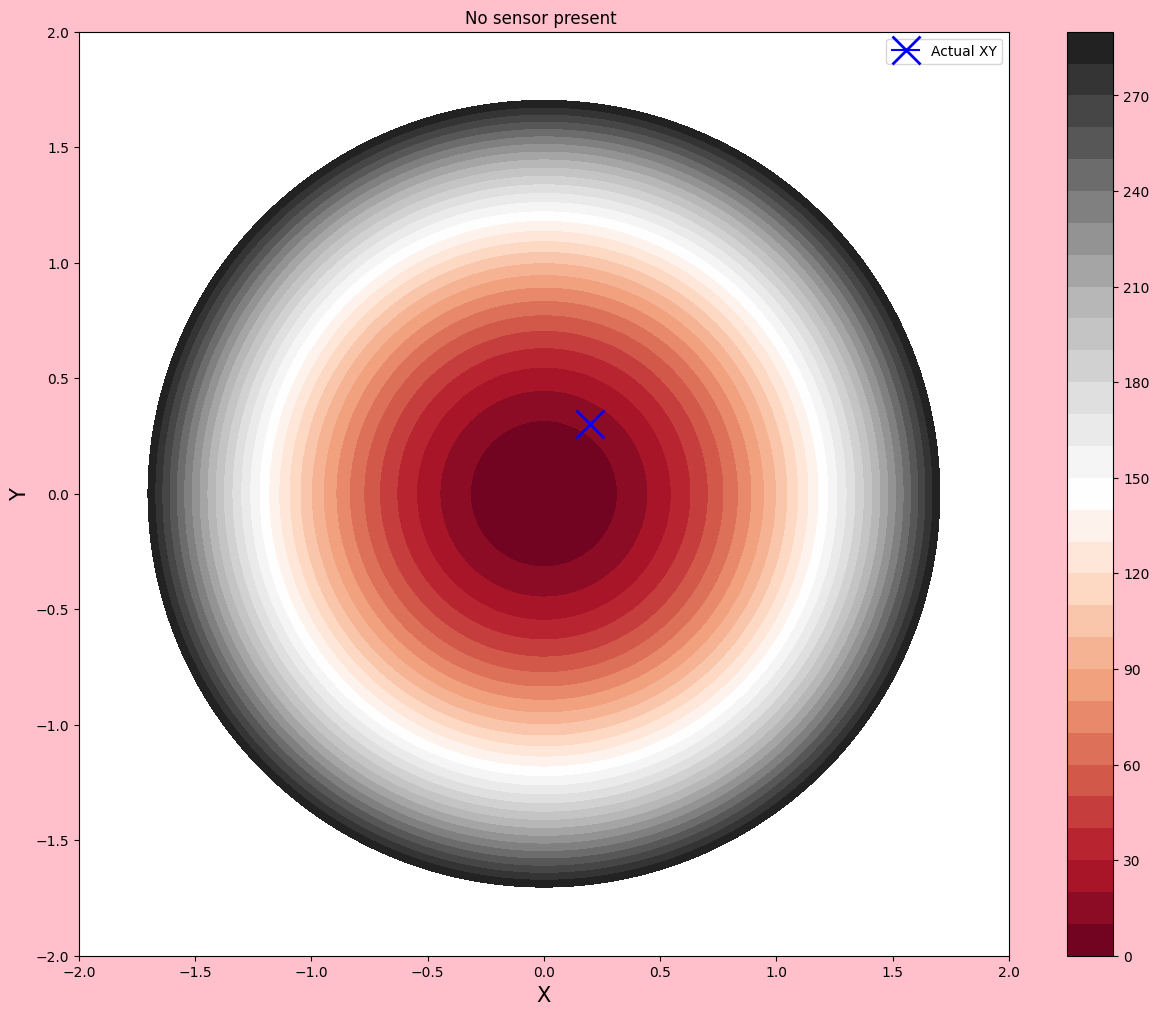

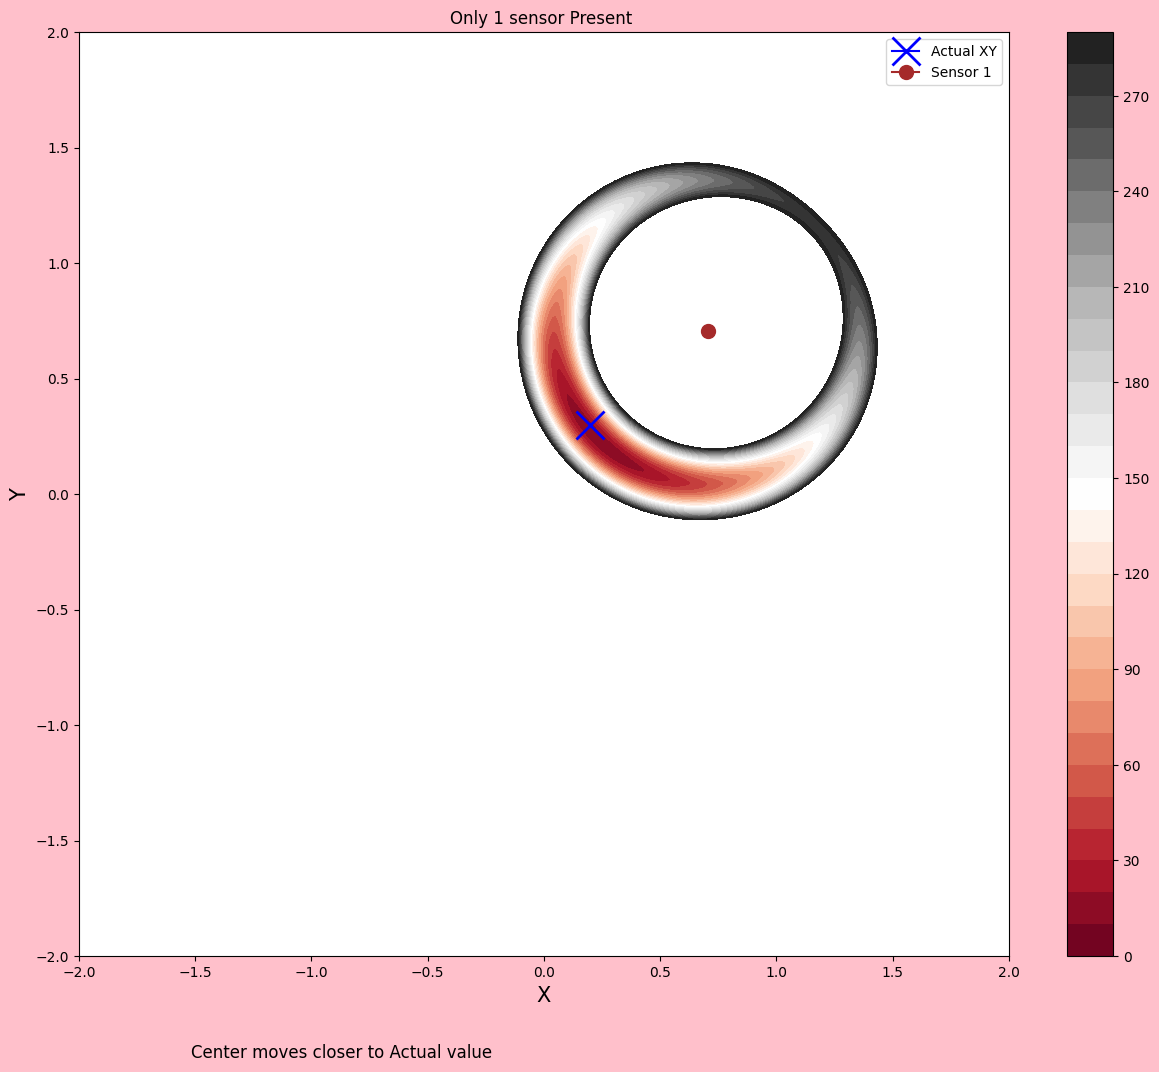

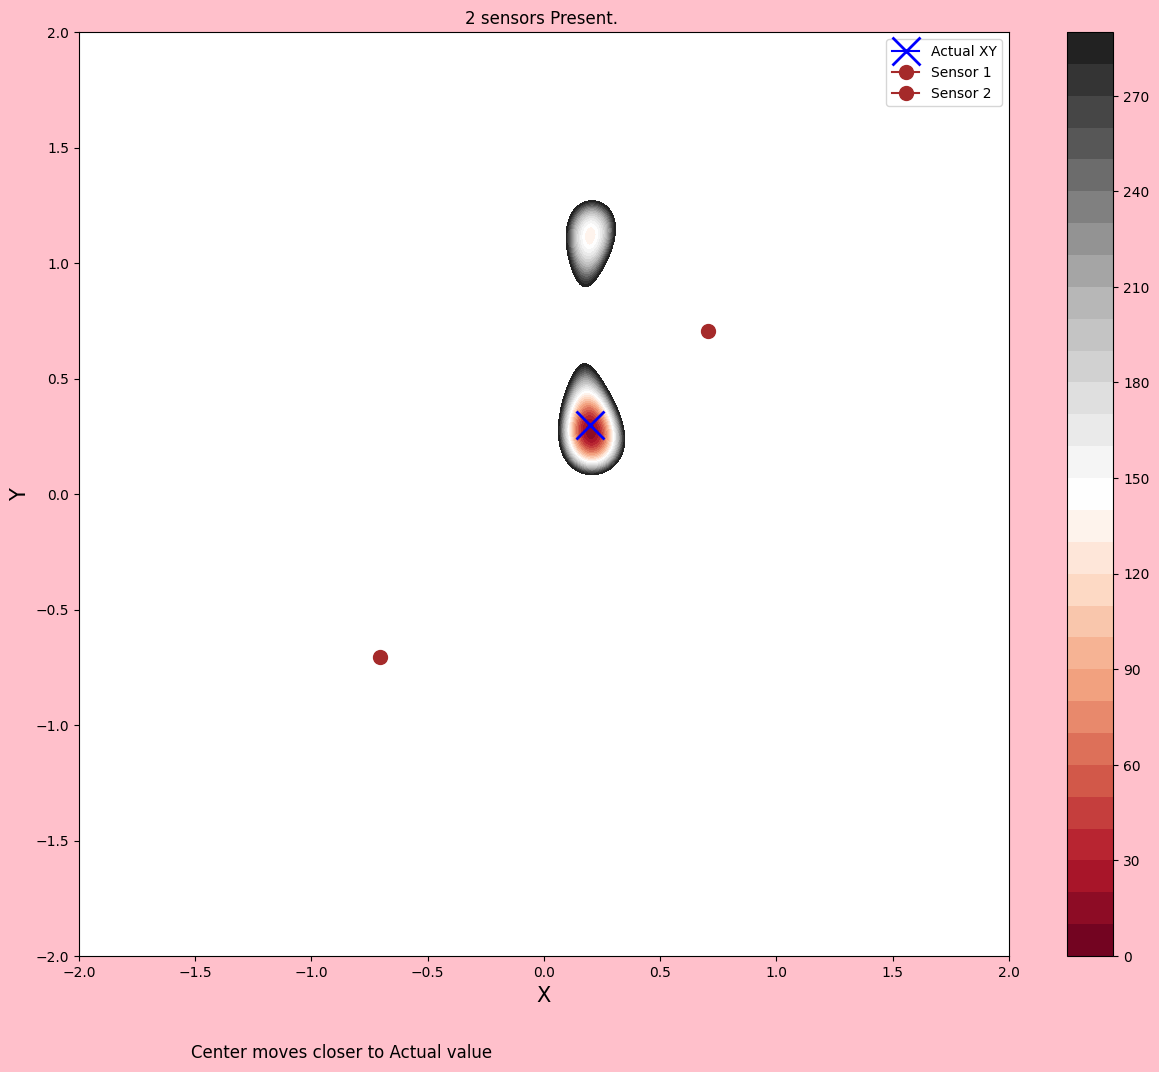

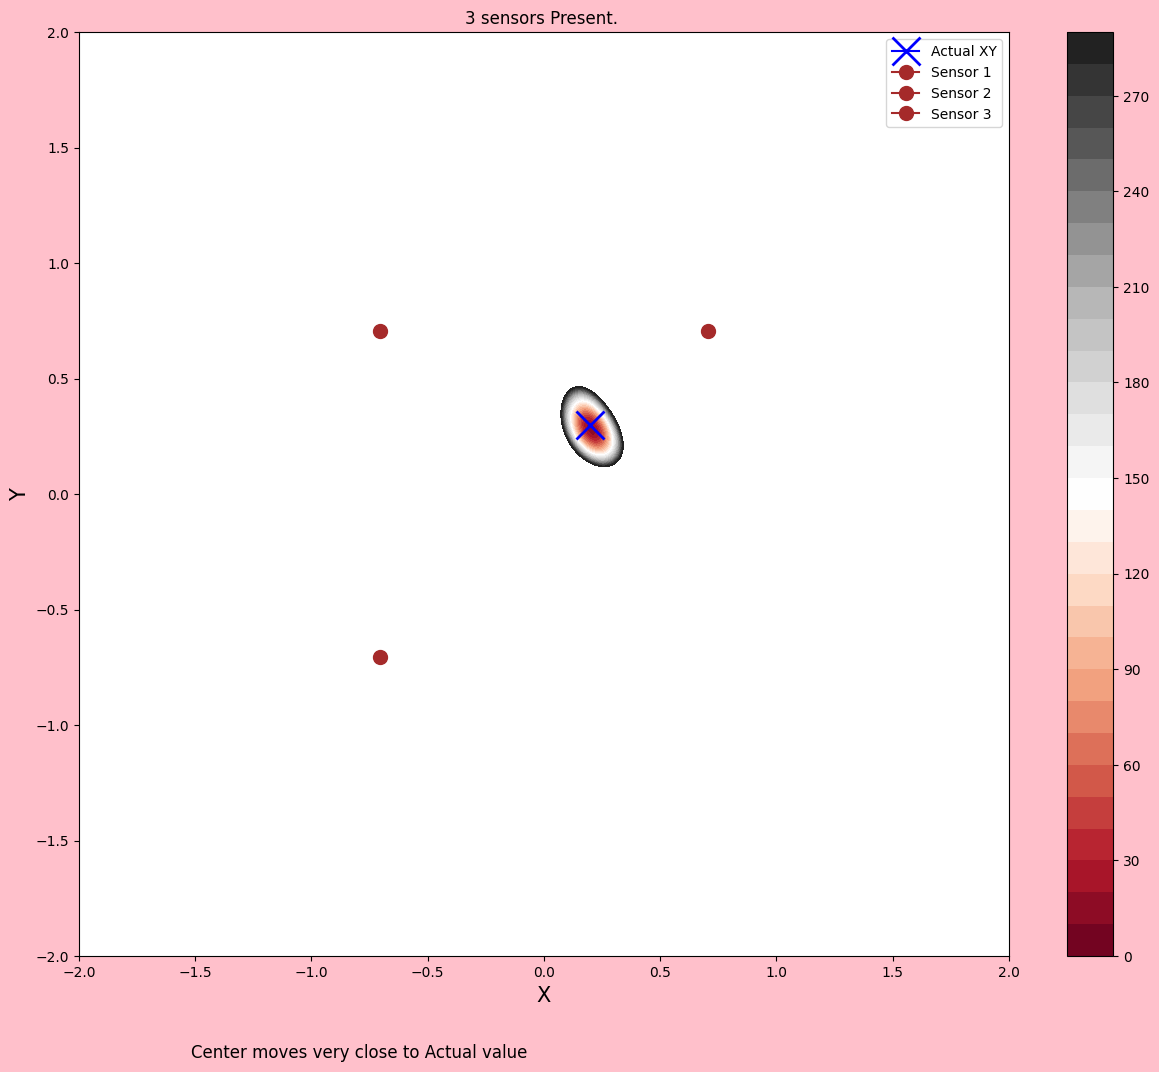

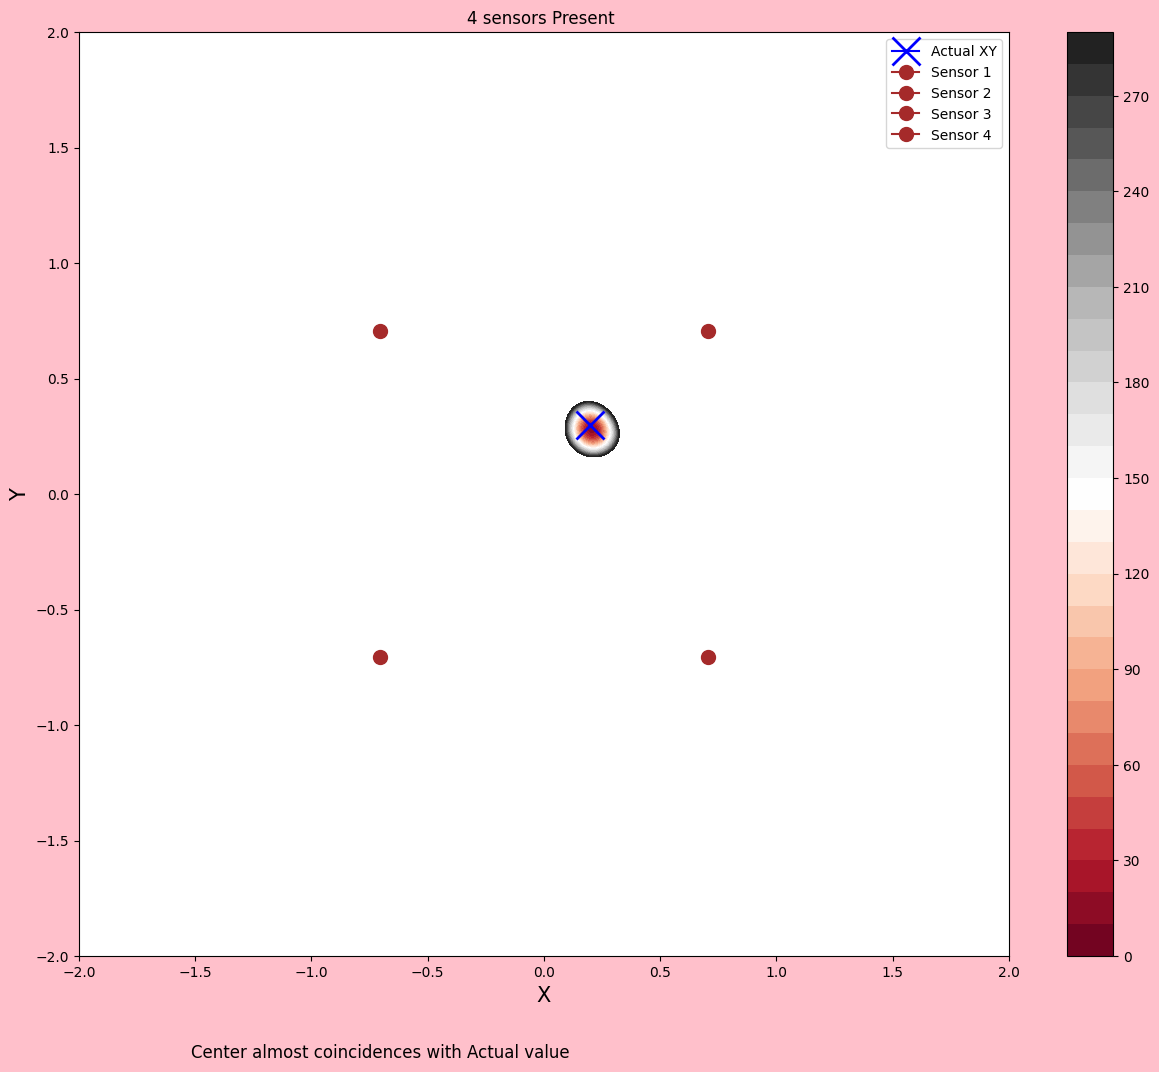

In [37]:
Fig = plots(f0,0)

plt.title('No sensor present ', fontsize = 12)
plt.xlabel('X', fontsize = 15);
plt.ylabel('Y', fontsize = 15);
fig.text(.2, 0.025, 'Centered at origin 0,0 -> which is the prior value', fontsize = 12);

fig = plots(f1,1)

plt.title('Only 1 sensor Present ', fontsize = 12)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15);
fig.text(.2,0.025, 'Center moves closer to Actual value', fontsize = 12);

fig = plots(f2,2)

plt.title('2 sensors Present. ', fontsize = 12)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15);
fig.text(.2,0.025, 'Center moves closer to Actual value', fontsize = 12);

fig = plots(f3,3)

plt.title('3 sensors Present. ', fontsize = 12)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15);
fig.text(.2,0.025, 'Center moves very close to Actual value', fontsize = 12);

fig = plots(f4,4)

plt.title('4 sensors Present ', fontsize = 12)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15);
fig.text(.2,0.025, 'Center almost coincidences with Actual value', fontsize = 12);